In [19]:
import cv2
from scikit.spatial import ConvexHull
import matplotlib.pyplot as plt
import numpy as np
import argparse
#%config InlineBackend.figure_format = 'svg'

ModuleNotFoundError: No module named 'scikit'

In [2]:
rows,cols = img.shape

M = cv2.getRotationMatrix2D((cols/2,rows/2),25,1)
dst = cv2.warpAffine(img,M,(cols,rows))

NameError: name 'img' is not defined

In [3]:
img = cv2.imread('/media/sf_TestImageDataBase/rectangle/jpeg_converted/NeckofFemur.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

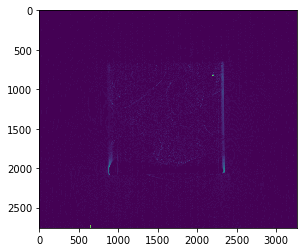

In [4]:
sobelx64f_y = cv2.Sobel(img
                        ,cv2.CV_64F,1,0,ksize=1)
abs_sobel64f_y = np.absolute(sobelx64f_y)
sobel_8u_y = np.uint8(abs_sobel64f_y)
plt.imshow(sobel_8u_y)
plt.show()

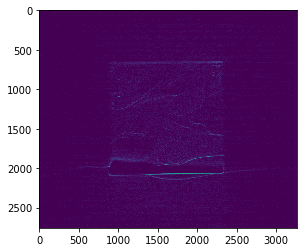

In [5]:
sobelx64f_x = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=1)
abs_sobel64f_x = np.absolute(sobelx64f_x)
sobel_8u_x = np.uint8(abs_sobel64f_x)
plt.imshow(sobel_8u_x)
plt.show()

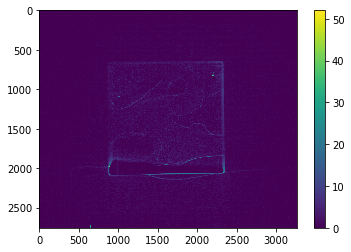

In [6]:
suma = sobel_8u_x+sobel_8u_y
plt.imshow(suma)
plt.colorbar()
plt.show()

In [10]:
poligon = cv2.convexHull(np.argwhere(suma>10))

[2755  654]
[2061 2343]
[2060 2345]
[2058 2347]
[2050 2354]
[1992 2354]
[1011 2338]
[ 814 2333]
[ 671 2320]
[ 653 2306]
[ 651 2304]
[ 711 1903]
[1079  997]
[1080  995]
[1081  994]
[1179  920]
[2720  652]
[2755  652]


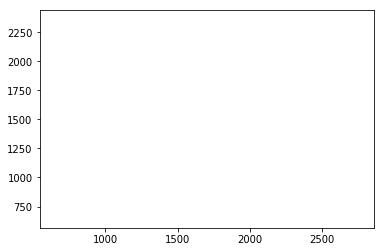

In [18]:
for asd in poligon:
    for asd2 in asd:
        print(asd2)
        plt.p
        lot(asd2[0], asd2[1], 'k-', color='w', linewidth = 20)
#plt.imshow(suma)
plt.show()

In [182]:
lower_limit = 500
upper_limit = 2000

mask, contours, hierarchy = cv2.findContours(suma/closed, cv2.RETR_CCOMP,cv2.CHAIN_APPROX_NONE)
print(len(contours))
valid_contours = []
valid_w = []
valid_h = []
out = np.zeros_like(img)
for cnt in contours:
    area = cv2.contourArea(cnt)
    #x,y,w,h = cv2.boundingRect(cnt)
    if((area >= lower_limit*lower_limit) & (area <= upper_limit*upper_limit)):
        cv2.drawContours(out, cnt, -1, 255,3)
        plt.imshow(out)
        plt.show()
        valid_contours.append(cnt)
        x,y,w,h = cv2.boundingRect(cnt)
        crop = img[y:y+h,x:x+w]
        plt.imshow(crop)
        plt.show()


error: /io/opencv/modules/core/src/matrix.cpp:436: error: (-215) u != 0 in function create


In [179]:
limit = 500
closed = cv2.morphologyEx(suma, cv2.MORPH_CLOSE,np.ones((limit,limit),np.uint8))

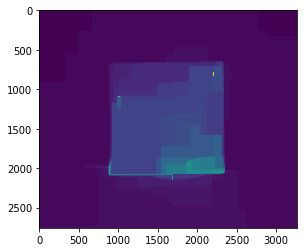

In [180]:
plt.imshow(closed)


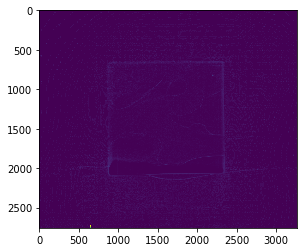

In [181]:
plt.imshow(suma/closed)


In [142]:
minLineLength = 500
maxLineGap = 700

In [144]:
lines_x = cv2.HoughLinesP(sobel_8u_x, 10, np.pi/180,200,minLineLength,maxLineGap)


In [145]:
print(len(lines_x))

9


In [146]:
for line in lines_x:
    for x1,y1,x2,y2 in line:
        cv2.line(img,(x1,y1),(x2,y2),(255,0,0),20)
        


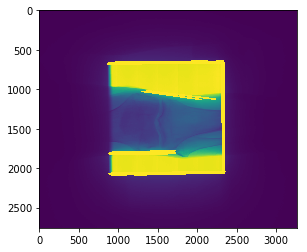

In [147]:
plt.imshow(img)
plt.show()

In [125]:
lines_y = cv2.HoughLinesP(sobel_8u_y, 5, 1.2*np.pi/180,200,minLineLength,maxLineGap)


In [126]:
print(len(lines_y))

7


In [127]:
for line in lines_y:
    for x1,y1,x2,y2 in line:
        cv2.line(img,(x1,y1),(x2,y2),(255,0,0),20)

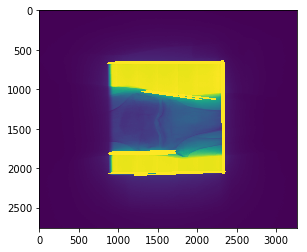

In [128]:
plt.imshow(img)
plt.show()

In [ ]:
lines = cv2

In [4]:
edges = cv2.Canny(img, 30, 50)
point_list = []
for i, line in enumerate(edges):
    for j, pixel in enumerate(line):
        if(pixel > 10):
            point_list.append([i,j])
point_list = np.asarray(point_list)

In [5]:
edges = cv2.Canny(img, 30, 50)
asd = np.multiply(edges, edges > 10)

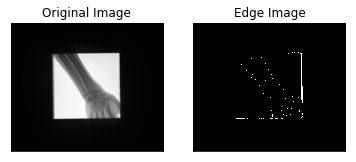

In [6]:
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [21]:
hull = ConvexHull(point_list)
hull.simplices

array([[ 5315, 25119],
       [29836,  6501],
       [31708, 28822],
       [26187, 25119],
       [   11,     0],
       [ 5899,  6501],
       [ 5899,  1759],
       [  781,  5315],
       [  781,   504],
       [32522, 32484],
       [27956, 28822],
       [ 1195,  1759],
       [ 1195,    11],
       [32440, 32484],
       [32440, 31427],
       [30540, 29836],
       [30540, 31427],
       [   10,     0],
       [   10,    31],
       [  295,   504],
       [  295,    31],
       [32130, 31708],
       [32130, 32522],
       [26452, 26187],
       [26679, 27956],
       [26679, 26452]], dtype=int32)

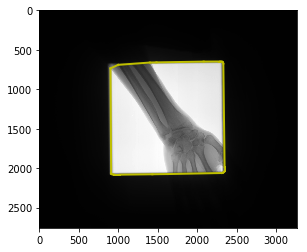

In [26]:
#plt.scatter(point_list[:,0], point_list[:,1])
for simplex in hull.simplices:
    plt.plot(point_list[simplex, 1], point_list[simplex, 0], 'k-', color='y', linewidth = 2)
plt.imshow(img, cmap = 'gray')
plt.show()

In [10]:
for simplex in hull.simplices:
    print

In [27]:
!pwd

/home/arnau/proyectito
